# 2 &emsp; Case Study: 15 vs. 50 Year Module <a id='2'></a>
***

This is a comparison case using the functions in CE-MFC to compare 15 year module reliability vs 50 year module reliability. *Note: what is CE-MFC?

![Folder 15 vs 50 year Module](images_wiki/2_15vs50Overview.PNG)     

This scenario is a though experiment comparing a 15-year 95% recyclable module versus a 50-year module 30% recyclable module.
This is done to understand potential tradeoffs in PV technology evolution — **is it better to create
a completely recyclable PV panel, or to extend the module lifetime?**

Assumptions:

* The 15-year module is 95% recyclable into high quality material, i.e. it will be used to create new modules.
* 95% recyclability is represented by a 100% collection rate and a 95% efficient recycling process.
* The 50-year module uses the previous settings. *Note: Are previous settings from the `'standard'` scenario?

Plot the annual waste glass sent to the landfill for this scenario. 
Here, because the 15-module is 100% collected and only 5% is landfilled during the recycling process
the landfilled glass is very low regardless of capacity assumptions.
Thus, if the intent is to avoid landfilled material, a 95% recyclable module is the best technology evolution.

<div class="alert alert-block alert-info">
<b>Tip:</b> This tutorial assumes that you have been through the tutorials 
<a href="./01_First_Simulations.ipynb">1</a>  and <a href="./02_Two_Scenarios_Two_Materials.ipynb">2</a>. Go back there if you need to refresh some steps!
</div>

## 2.1 &emsp; Project Setup

### 2.1.1 &emsp; Load Packages and Set the Paths.

In [1]:
import os
from pathlib import Path
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
testfolder = str(Path().resolve() / 'TEMP') # Path to the simulation folder.

baselinefolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'baselines')  # Path to baselines and data.

print ("Your simulation will be stored in %s" % testfolder)
print ("Your baselines are stored in %s" % baselinefolder)

Your simulation will be stored in /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/docs/tutorials/tutorials_v2/TEMP
Your baselines are stored in /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/PV_ICE/baselines


### 2.1.2 &emsp; Simulation Configuration

Let's start by defining our simulation. In this project, we will create three scenarios:
* `'base'`: Standard scenario we have seen so far with the default baseline values. 
* `'50_Year_Module'`: Simulation of a 50 year old module with lower recyclability and higher reliability(the reliability and recyclability values will be modified in Section 3.2.3 and 3.2.4 respectively).
* `'15_Year_Module'`: Simulation of a 15 year old module with higher recyclability and higher reliability (the reliability and recyclability values will be modified in Section 3.2.3 and 3.2.4 respectively).

All these scenarios will be loaded with the same materials: `'glass'`, `'silicon'`, `'silver'`, `'copper'`, `'aluminium_frames'` and `'encapsulant'`.


In [3]:
r2 = PV_ICE.Simulation(name='Simulation_2', path=testfolder)

r2.createScenario(name='50_Year_Module', file=baselinefolder + '/baseline_modules_US.csv')
r2.scenario['50_Year_Module'].addMaterial('glass', file=baselinefolder + '/baseline_material_glass.csv')
r2.scenario['50_Year_Module'].addMaterial('silicon', file=baselinefolder + '/baseline_material_silicon.csv')
r2.scenario['50_Year_Module'].addMaterial('silver', file=baselinefolder + '/baseline_material_silver.csv')
r2.scenario['50_Year_Module'].addMaterial('copper', file=baselinefolder + '/baseline_material_copper.csv')
r2.scenario['50_Year_Module'].addMaterial('aluminium_frames', file=baselinefolder + '/baseline_material_aluminium_frames.csv')
r2.scenario['50_Year_Module'].addMaterial('encapsulant', file=baselinefolder + '/baseline_material_encapsulant.csv')

r2.createScenario(name='15_Year_Module', file=baselinefolder + '/baseline_modules_US.csv')
r2.scenario['15_Year_Module'].addMaterial('glass', file=baselinefolder + '/baseline_material_glass.csv')
r2.scenario['15_Year_Module'].addMaterial('silicon', file=baselinefolder + '/baseline_material_silicon.csv')
r2.scenario['15_Year_Module'].addMaterial('silver', file=baselinefolder + '/baseline_material_silver.csv')
r2.scenario['15_Year_Module'].addMaterial('copper', file=baselinefolder + '/baseline_material_copper.csv')
r2.scenario['15_Year_Module'].addMaterial('aluminium_frames', file=baselinefolder + '/baseline_material_aluminium_frames.csv')
r2.scenario['15_Year_Module'].addMaterial('encapsulant', file=baselinefolder + '/baseline_material_encapsulant.csv')

r2.createScenario(name='base', file=baselinefolder + '/baseline_modules_US.csv')
r2.scenario['base'].addMaterial('glass', file=baselinefolder + '/baseline_material_glass.csv')
r2.scenario['base'].addMaterial('silicon', file=baselinefolder + '/baseline_material_silicon.csv')
r2.scenario['base'].addMaterial('silver', file=baselinefolder + '/baseline_material_silver.csv')
r2.scenario['base'].addMaterial('copper', file=baselinefolder + '/baseline_material_copper.csv')
r2.scenario['base'].addMaterial('aluminium_frames', file=baselinefolder + '/baseline_material_aluminium_frames.csv')
r2.scenario['base'].addMaterial('encapsulant', file=baselinefolder + '/baseline_material_encapsulant.csv')

path = /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/docs/tutorials/tutorials_v2/TEMP


#### 2.1.2.1 &emsp; Change Reliability Values

Let's check out the data and material keys that we can modify.

In [4]:
print(r2.scenario['50_Year_Module'].data.keys())
print(r2.scenario['50_Year_Module'].material['glass'].materialdata.keys()) # Here you can use whichever material, all of them have the same material column keys.

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_Repair', 'mod_MerchantTail', 'mod_EOL_collection_eff',
       'mod_EOL_pg0_resell', 'mod_EOL_pg1_landfill', 'mod_EOL_pg2_stored',
       'mod_EOL_pg3_reMFG', 'mod_EOL_pg4_recycled', 'mod_EOL_reMFG_yield',
       'mod_EOL_sp_reMFG_recycle', 'mod_EOL_pb1_landfill',
       'mod_EOL_pb2_stored', 'mod_EOL_pb3_reMFG', 'mod_EOL_pb4_recycled'],
      dtype='object')
Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_PG3_ReMFG_target',
       'mat_ReMFG_yield', 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG'],
      dtype='object')


Now we modify certain columns to model each module according to the mentioned characteristics.

In [5]:
r2.scenario['50_Year_Module'].data['mod_reliability_t50'] = 60
r2.scenario['50_Year_Module'].data['mod_reliability_t90'] = 70
r2.scenario['50_Year_Module'].data['mod_lifetime'] = 50
r2.scenario['15_Year_Module'].data['mod_degradation'] = 0.4

r2.scenario['15_Year_Module'].data['mod_reliability_t50'] = 20
r2.scenario['15_Year_Module'].data['mod_reliability_t90'] = 25
r2.scenario['15_Year_Module'].data['mod_lifetime'] = 15
r2.scenario['15_Year_Module'].data['mod_degradation'] = 1.4

#### 2.2.2.2 &emsp; Change Recyclability Values

As we did before, let us check the possible keys to modify the materials.

In [6]:
print(r2.scenario['50_Year_Module'].material['glass'].materialdata.keys()) # Here you can use whichever material, all of them have the same material column keys.

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_PG3_ReMFG_target',
       'mat_ReMFG_yield', 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG'],
      dtype='object')


In [7]:
r2.scenario['15_Year_Module'].data['mod_EOL_collected_recycled'] = 100.0 #100% collection
r2.scenario['15_Year_Module'].data['mod_EOL_collection_eff'] = 100.0
#r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_eff'] = 100 #100% efficiency of recycling
r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_recycled'] = 100.0
r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_recycling_eff'] = 90.0
r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100.0
r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100.0
r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_EOL_collected_Recycled'] = 100.0
r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_EOL_Recycling_eff'] = 90.0
r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100.0
r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 100.0 #95% of the above 2 gets turned into new panels

r2.scenario['50_Year_Module'].data['mod_EOL_collected_recycled'] = 100.0 #100% collection
r2.scenario['50_Year_Module'].data['mod_EOL_collection_eff'] = 100.0
#r2.scenario['50_Year_Module'].material['glass'].materialdata['mat_MFG_eff'] = 100 #100% efficiency of recycling
r2.scenario['50_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_recycled'] = 100.0
r2.scenario['50_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_recycling_eff'] = 30.0
r2.scenario['50_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100.0
r2.scenario['50_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100.0
r2.scenario['50_Year_Module'].material['glass'].materialdata['mat_EOL_collected_Recycled'] = 100.0
r2.scenario['50_Year_Module'].material['glass'].materialdata['mat_EOL_Recycling_eff'] = 30.0
r2.scenario['50_Year_Module'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100.0
r2.scenario['50_Year_Module'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 100.0 #95% of the above 2 gets turned into new panels


# 2.2 &emsp; Running the simulation

I need a little explanation here to understand the importance here of turning IRENA lifetime values on or off.

### 2.2.1 &emsp; IRENA Status and Mass Flow Calculations 

<div class="alert alert-block alert-warning">
I think that this tutorial could use a lot of more explanation. Also, since it is a practical study and based on what I have seen in the following two tutorials, those could go before this tutorial. For example, tutorial 4 explains how Weibull works, whereas this one jumps into it without explanation at all.
</div>

In [9]:
IRENA= False
ELorRL = 'RL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759, 'beta': 30}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49, 'beta': 30}  # Regular-loss scenario IRENA
    r3.calculateMassFlow(weibullInputParams=weibullInputParams)
    title_Method = 'Irena_'+ELorRL
else:
    r2.calculateMassFlow()
    title_Method = 'PVICE'

Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant


After running the simulation we can see the newly added columns:

### 2.2.2 &emsp; Visualize results 

In [10]:
r2.scenario['base'].material['glass'].materialdata.keys()

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_PG3_ReMFG_target',
       'mat_ReMFG_yield', 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG', 'mat_L0',
       'mat_PG2_stored', 'mat_L1', 'mat_reMFG', 'mat_reMFG_mod_unyield',
       'mat_reMFG_target', 'mat_reMFG_untarget', 'mat_reMFG_yield',
       'mat_reMFG_unyield', 'mat_reMFG_all_unyields', 'mat_reMFG_2_recycle',
       'mat_L2', 'mat_recycled_PG4', 'mat_recycled_all', 'mat_recycled_target',
       'mat_L3', 'mat_recycled_yield', 'mat_L4', 'mat_EOL_Recycled_2_HQ',
       'mat_EOL_Recycled_2_OQ', 'mat_EOL_Recycled_HQ_into_MFG',
       'mat_EOL_Recycled_HQ_into_OU', 'mat_EnteringModuleManufacturing_total',
       'mat_UsedSuccessfullyinModuleManufacturing',
       'mat_LostinModuleManufact

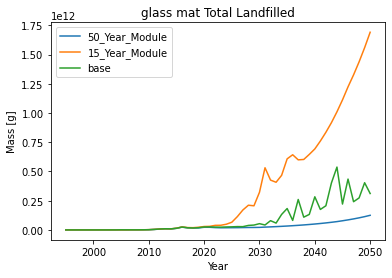

In [11]:
r2.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')

Modules installed between 2010 and 2020 become decommissioned on ~2035-2045, that is why the baseline has 'jaggedy' lines that follow the installs on those years.
This jaggedy lines are not seen in the 15_Year_Module example, because 90% of it is going into recycling. You can still see a bit of effect on 2025-2035.
For base, after 2045, and for 15_years, after 2035 become nice curves because the installs follow a CAGR projection.
IF more years where plotted for the 50_year_module, we would see the same jaggediness around 2065-2075.

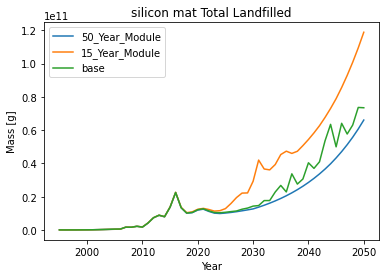

In [12]:
r2.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')

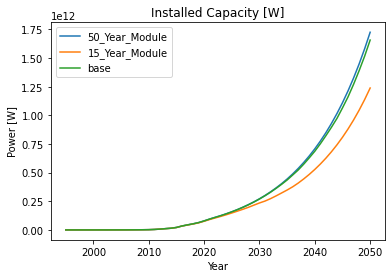

In [13]:
r2.plotScenariosComparison(keyword='Installed_Capacity_[W]')

Make some comments on these plots.

### 2.2.3 &emsp; Add a new scenario

Why? Let us now modify the installed capacity requirements to match the 50 year module. This one also modifies reliability (is this for the weibull?)

In [14]:
r2.createScenario(name='15_Year_Module_IncreasedInstalls', file=baselinefolder + '/baseline_modules_US.csv')
r2.scenario['15_Year_Module_IncreasedInstalls'].addMaterial('glass', file=baselinefolder + '/baseline_material_glass.csv')
r2.scenario['15_Year_Module_IncreasedInstalls'].data['mod_reliability_t50'] = 20
r2.scenario['15_Year_Module_IncreasedInstalls'].data['mod_reliability_t90'] = 25
r2.scenario['15_Year_Module_IncreasedInstalls'].data['mod_lifetime'] = 15
r2.scenario['15_Year_Module_IncreasedInstalls'].data['mod_degradation'] = 1.4

r2.scenario['15_Year_Module_IncreasedInstalls'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r2.scenario['15_Year_Module_IncreasedInstalls'].data['mod_EOL_collection_eff'] = 100
#r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_eff'] = 100 #100% efficiency of recycling
r2.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_recycled'] = 100
r2.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_recycling_eff'] = 90
r2.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100
r2.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100
r2.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_EOL_collected_Recycled'] = 100
r2.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_EOL_Recycling_eff'] = 90 
r2.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100 
r2.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 100 #95% of the above 2 gets turned into new panels

r2.calculateMassFlow()


Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedI

KeyError: 'silicon'

I get error with silicon on this one! KeyWrror: 'silicon'

### 2.2.4 &emsp; Modify the Installed Capacity

Let us now modify the installed capacity requirements according to t50 (why?). This one will be a long simulation because it needs to run each year to calculate yearly accumulated installs and deads.

In [15]:
Under_Installment = []
for i in range (0, len(r2.scenario['base'].data)):
    Under_Installment = ( (r2.scenario['base'].data['Installed_Capacity_[W]'][i] - 
                         r2.scenario['15_Year_Module_IncreasedInstalls'].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
    r2.scenario['15_Year_Module_IncreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] += Under_Installment
    r2.calculateMassFlow()

/var/folders/w2/85_h_nyn0mlbxf81x3k9n53xh90n_1/T/ipykernel_80177/1158026038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2.scenario['15_Year_Module_IncreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] += Under_Installment


Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedI

KeyError: 'silicon'

More changes

In [16]:
r2.createScenario(name='50_Year_Module_DecreasedInstalls', file=baselinefolder + '/baseline_modules_US.csv')
r2.scenario['50_Year_Module_DecreasedInstalls'].addMaterial('glass', file=baselinefolder + '/baseline_material_glass.csv')
r2.scenario['50_Year_Module_DecreasedInstalls'].data['mod_reliability_t50'] = 60
r2.scenario['50_Year_Module_DecreasedInstalls'].data['mod_reliability_t90'] = 70
r2.scenario['50_Year_Module_DecreasedInstalls'].data['mod_lifetime'] = 50
r2.scenario['50_Year_Module_DecreasedInstalls'].data['mod_degradation'] = 0.4

r2.scenario['50_Year_Module_DecreasedInstalls'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r2.scenario['50_Year_Module_DecreasedInstalls'].data['mod_EOL_collection_eff'] = 100
#r2.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_eff'] = 100 #100% efficiency of recycling
r2.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_recycled'] = 100
r2.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_recycling_eff'] = 30
r2.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100
r2.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100
r2.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_EOL_collected_Recycled'] = 100
r2.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_EOL_Recycling_eff'] = 30 
r2.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100 
r2.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 100 #95% of the above 2 gets turned into new panels  
    
r2.calculateMassFlow()

Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
Working on Scenario:  15_Year_Module_IncreasedI

KeyError: 'silicon'

In [ ]:
Over_Installment = []
for i in range (0, len(r2.scenario['base'].data)):
    Over_Installment = ( (r2.scenario['50_Year_Module_DecreasedInstalls'].data['Installed_Capacity_[W]'][i] - 
                         r2.scenario['base'].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
    r2.scenario['50_Year_Module_DecreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] -= Over_Installment
    r2.calculateMassFlow()

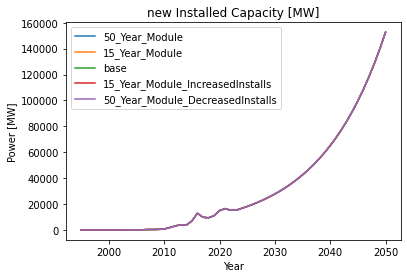

In [17]:
r2.plotScenariosComparison(keyword='new_Installed_Capacity_[MW]')

KeyError: 'Installed_Capacity_[W]'

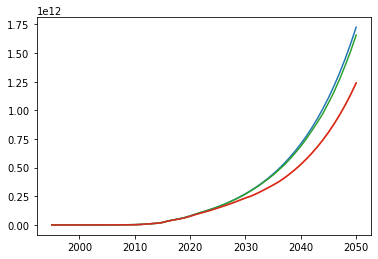

In [18]:
r2.plotScenariosComparison(keyword='Installed_Capacity_[W]')

In [ ]:
r2.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')

## 2.3 &emsp; Additional plotting options

This one is to plot the same as before but not automatic, so we can control more parameters.

KeyError: 'Installed_Capacity_[W]'

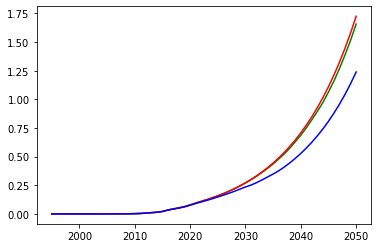

In [19]:
plt.plot(r2.scenario['base'].data['year'], r2.scenario['base'].data['Installed_Capacity_[W]']/1e12, 'g', label='base')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['50_Year_Module'].data['Installed_Capacity_[W]']/1e12, 'r', label='50 year Module')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['15_Year_Module'].data['Installed_Capacity_[W]']/1e12, 'b', label='15 year Module')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['50_Year_Module_DecreasedInstalls'].data['Installed_Capacity_[W]']/1e12, 'r--', label='50 year Module w base capacity')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['15_Year_Module_IncreasedInstalls'].data['Installed_Capacity_[W]']/1e12, 'b--', label='15 year Module w. base capacity')

plt.ylabel('Power [TW]')

plt.title('Installed Active Capacity')
plt.xlim([2000, 2050])
plt.legend()

 

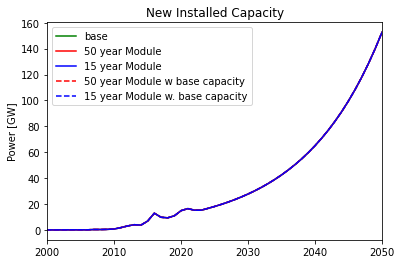

In [20]:
plt.plot(r2.scenario['base'].data['year'], r2.scenario['base'].data['new_Installed_Capacity_[MW]']/1e3, 'g', label='base')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['50_Year_Module'].data['new_Installed_Capacity_[MW]']/1e3, 'r', label='50 year Module')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['15_Year_Module'].data['new_Installed_Capacity_[MW]']/1e3, 'b', label='15 year Module')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['50_Year_Module_DecreasedInstalls'].data['new_Installed_Capacity_[MW]']/1e3, 'r--', label='50 year Module w base capacity')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['15_Year_Module_IncreasedInstalls'].data['new_Installed_Capacity_[MW]']/1e3, 'b--', label='15 year Module w. base capacity')

plt.ylabel('Power [GW]')

plt.title('New Installed Capacity')
plt.xlim([2000, 2050])
plt.legend()


KeyError: 'mat_Virgin_Stock'

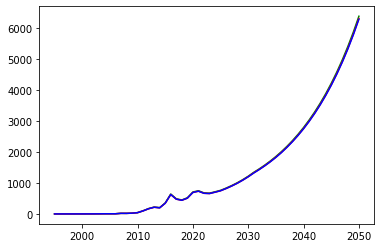

In [21]:
plt.plot(r2.scenario['base'].data['year'], r2.scenario['base'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'g', label='base')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['50_Year_Module'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'r', label='50 Year Module')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'b', label='15 Year Module')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'r--', label='50 Year Module w. base capacity')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'b--', label='15 Year Module w. base capacity')

plt.ylabel('Virgin Glass [Million Tonnes]')
plt.legend()
plt.title('Annual Virgin Material Input')
plt.xlim([2000, 2050])



KeyError: 'mat_Total_Landfilled'

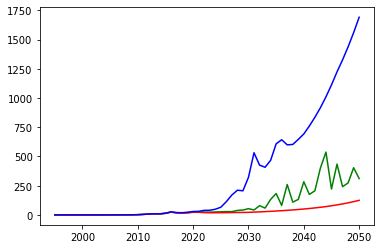

In [22]:
plt.plot(r2.scenario['base'].data['year'], r2.scenario['base'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'g', label='base')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['50_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'r', label='50 Year Module')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'b', label='15 Year Module')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'r--', label='50 Year Module w. base capacity')
plt.plot(r2.scenario['base'].data['year'], r2.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'b--', label='15 Year Module w. base capacity')

plt.ylabel('Landfilled Glass\n [Million Tonnes]')
plt.legend()
plt.title('Annual Landfilled Waste')
plt.xlim([2000, 2050])



## 3.4 &emsp; Calculation of Changes between Scenarios

In [23]:
cum_Waste = []
cum_VirginNeeds = []
cum_InstalledCapacity = []
cum_NewInstalls = []

for ii in range (0, len(r2.scenario.keys())):
    # Cumulative
    scen = list(r2.scenario.keys())[ii]
    cum_Waste.append(r2.scenario[scen].material['glass'].materialdata['mat_Total_Landfilled'].sum())
    cum_VirginNeeds.append(r2.scenario[scen].material['glass'].materialdata['mat_Virgin_Stock'].sum())
    cum_NewInstalls.append(r2.scenario[scen].data['new_Installed_Capacity_[MW]'].sum())
    cum_InstalledCapacity.append(r2.scenario[scen].data['Installed_Capacity_[W]'].iloc[-1])

df = pd.DataFrame(list(zip(list(r3.scenario.keys()), cum_Waste, cum_VirginNeeds, cum_NewInstalls, cum_InstalledCapacity)),
               columns =['scenarios','cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity'])


KeyError: 'mat_Total_Landfilled'

### 2.4.1 &emsp; Normalization

In [24]:
df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']] = df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']]*100/df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']].iloc[2] -100

NameError: name 'df' is not defined

In here df is not defined. 

### 2.4.2 &emsp; LCA Analysis

We have previously obtained results for landfilled waste for 50 year module, 15 year module, and 15 year module with increased installations to reach to 50 year module installed capacity. This is applies the LCA methodology to evaluate environmental impacts based on landfilled area.

In [25]:
Area_50years = r2.scenario['50_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled'].sum()
Area_15years = r2.scenario['15_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled'].sum()
Area_15years_Increased_Installs = r2.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_Total_Landfilled'].sum()


First we calculate the Area, based on the glass thickness and glass density and the Total Landfilled Waste [kg]. The PV panel area will be equal to the Glass Area for our modeled scenarios so far.

In [26]:
[acidification, carcinogenics, ecotoxicity, eutrophication, 
fossil_fuel_depletion, global_warming,
non_carcinogenics, ozone_depletion, respiratory_effects, smog] = PV_ICE.calculateLCA(Area_50years)

In [27]:
[acidification2, carcinogenics2, ecotoxicity2, eutrophication2, 
fossil_fuel_depletion2, global_warming2,
non_carcinogenics2, ozone_depletion2, respiratory_effects2, smog2] = PV_ICE.calculateLCA(Area_15years)


In [28]:
[acidification3, carcinogenics3, ecotoxicity3, eutrophication3, 
fossil_fuel_depletion3, global_warming3,
non_carcinogenics3, ozone_depletion3, respiratory_effects3, smog3] = PV_ICE.calculateLCA(Area_15years_Increased_Installs)

In [29]:
global_warming = pd.DataFrame({'Global warming':['50 year', '15 year', '15 year Increased Installs'], 
                               'val':[global_warming, global_warming2, global_warming3]})

Text(0.5, 1.0, 'Global Warming Effect, in kg CO2 eq')

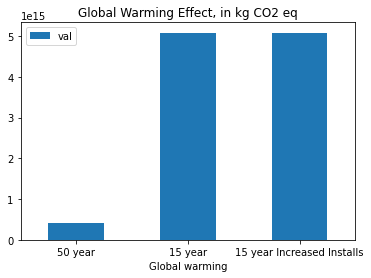

In [30]:
ax = global_warming.plot.bar(x='Global warming', y='val', rot=0)
plt.title('Global Warming Effect, in kg CO2 eq')